# 宏观经济学

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [73]:
origin = pd.read_csv('share.csv', index_col='日期')
df = origin[0:-2]
df = df.iloc[::-1]
df

,收盘,开盘,高,低,交易量,涨跌幅
日期,,,,,,
2011年6月13日,"2,700.38","2,687.65","2,703.42","2,669.40",6.31B,-0.18
2011年6月14日,"2,730.04","2,696.22","2,735.55","2,691.67",8.31B,1.10
2011年6月15日,"2,705.43","2,717.68","2,730.48","2,705.07",7.49B,-0.90
2011年6月16日,"2,664.28","2,685.63","2,691.94","2,663.12",7.09B,-1.52
2011年6月17日,"2,642.82","2,661.41","2,675.03","2,641.39",6.44B,-0.81
...,...,...,...,...,...,...
2021年6月28日,"3,606.37","3,612.25","3,614.36","3,594.22",32.13B,-0.03
2021年6月29日,"3,573.18","3,601.68","3,601.83","3,570.53",30.61B,-0.92
2021年6月30日,"3,591.20","3,572.62","3,594.12","3,569.50",26.82B,0.50


In [74]:
df.loc[:,('开盘', '收盘', '高', '低')] = df.loc[:,('开盘', '收盘', '高', '低')].replace(',','', regex=True).astype('float')
df['交易量'] = df['交易量'].replace('B','', regex=True).astype('float')
df

,收盘,开盘,高,低,交易量,涨跌幅
日期,,,,,,
2011年6月13日,2700.38,2687.65,2703.42,2669.40,6.31,-0.18
2011年6月14日,2730.04,2696.22,2735.55,2691.67,8.31,1.10
2011年6月15日,2705.43,2717.68,2730.48,2705.07,7.49,-0.90
2011年6月16日,2664.28,2685.63,2691.94,2663.12,7.09,-1.52
2011年6月17日,2642.82,2661.41,2675.03,2641.39,6.44,-0.81
...,...,...,...,...,...,...
2021年6月28日,3606.37,3612.25,3614.36,3594.22,32.13,-0.03
2021年6月29日,3573.18,3601.68,3601.83,3570.53,30.61,-0.92
2021年6月30日,3591.20,3572.62,3594.12,3569.50,26.82,0.50


<AxesSubplot:xlabel='日期'>

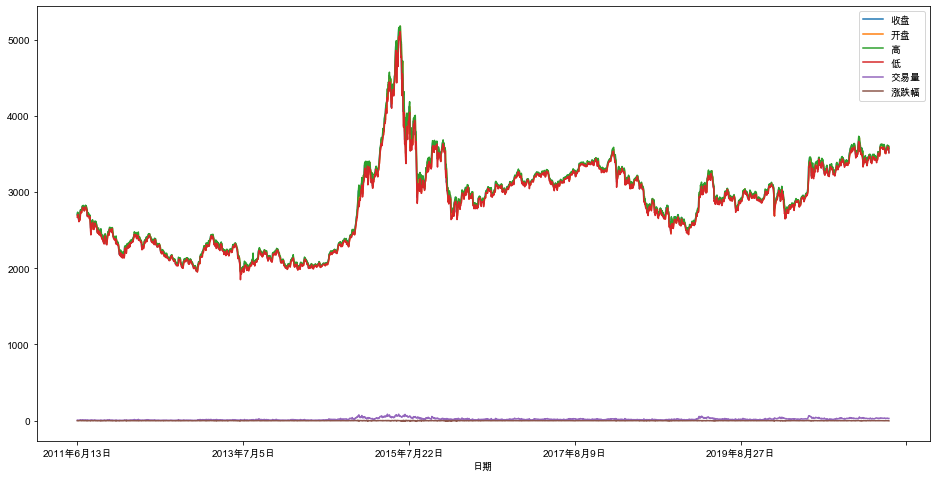

In [75]:
fig, ax = plt.subplots(figsize=(16,8))
df.plot(ax=ax)

<AxesSubplot:title={'center':'交易量'}, xlabel='日期'>

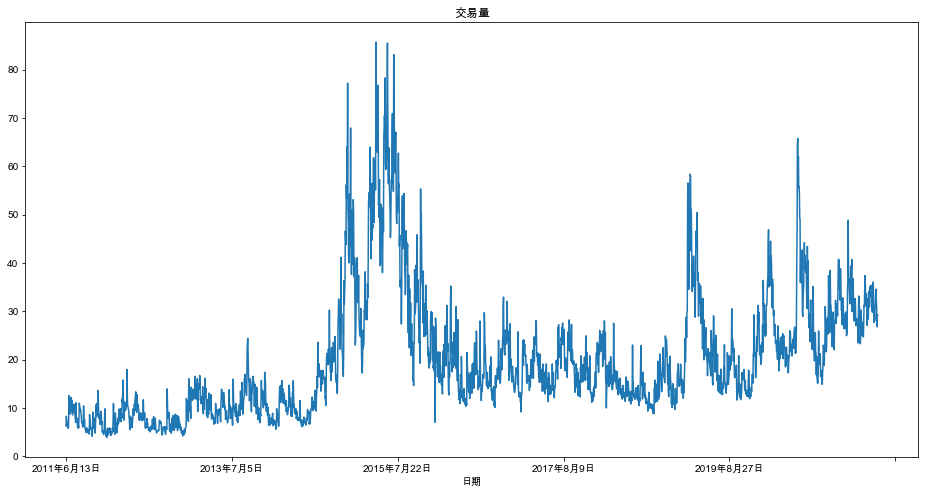

In [76]:
df['交易量'].plot(figsize=(16,8), title="交易量")

<AxesSubplot:title={'center':'涨跌幅'}, xlabel='日期'>

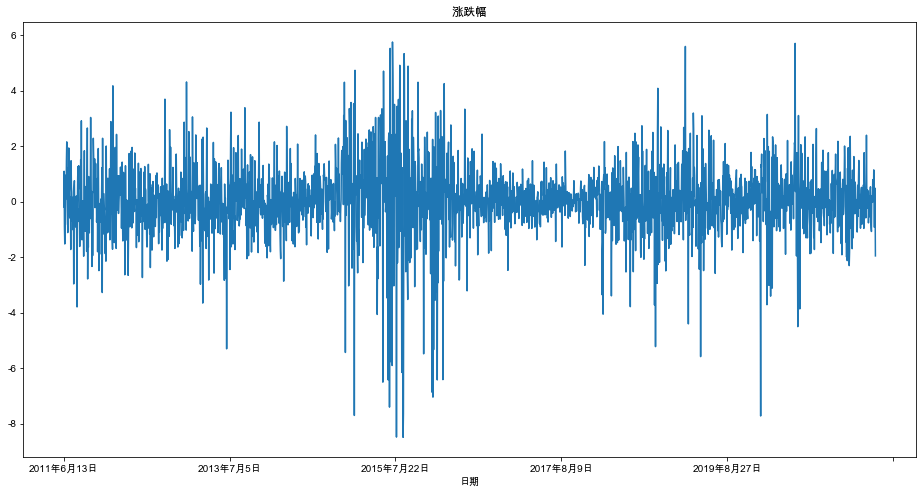

In [77]:
df['涨跌幅'].plot(figsize=(16,8), title="涨跌幅")

# 时间序列分析

## 自相关性

/Users/thales/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.99631157, 0.99262134, 0.98913832, 0.98565268,
       0.98162599, 0.97768497, 0.9740862 , 0.97010625, 0.96577995,
       0.96139583, 0.95750274, 0.95379562, 0.94984327, 0.94579142,
       0.94204035, 0.93829461, 0.93438266, 0.93025611, 0.92639184,
       0.92262664, 0.91826125, 0.91359075, 0.90917446, 0.90529816,
       0.90148518, 0.89745408, 0.89347777, 0.88982622, 0.88604017,
       0.88209662, 0.87846671, 0.87525896, 0.87218596, 0.86859617,
       0.86477555, 0.86098797, 0.85689679, 0.85295247, 0.84897388,
       0.84530812, 0.84125692, 0.83683181, 0.83196337, 0.82701369,
       0.8221906 , 0.81755183, 0.81306438, 0.80867009, 0.80414151,
       0.79980137, 0.79560906, 0.79148068, 0.78758586, 0.78371181,
       0.77999243, 0.77631378, 0.77276182, 0.76916981, 0.76552601,
       0.76169285, 0.75807249, 0.7540574 , 0.75025239, 0.7465261 ,
       0.74301904, 0.73991026, 0.73704002, 0.73430898, 0.7313947 ,
       0.72856559, 0.72587105, 0.72288104, 0.71985027, 0.71699

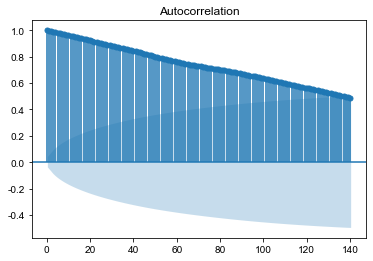

In [78]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
fig, ax = plt.subplots()
tsaplots.plot_acf(df["开盘"], lags=140, ax=ax)
stattools.acf(df["开盘"], nlags=140)

140阶进入置信区间
## 偏自相关性

array([ 1.00000000e+00,  9.96718731e-01, -2.32907755e-03,  2.96078328e-02,
       -2.37983145e-03, -8.37884995e-02,  1.09836343e-02,  4.55515329e-02,
       -6.02794853e-02, -4.62048085e-02, -1.63461573e-02,  6.33247860e-02,
        3.67248700e-02, -2.86172617e-02, -2.15747390e-02,  3.10064560e-02,
       -4.97091898e-04, -1.05559852e-02, -3.87570593e-02,  1.81785465e-02,
        1.10627529e-02, -8.03819340e-02, -4.39512693e-02,  2.11125868e-02,
        7.52870479e-02,  3.61297852e-02, -2.75136822e-02, -1.53295595e-02,
        3.75806259e-02, -3.71351606e-03, -8.34947207e-03,  2.28635563e-02,
        3.19489607e-02,  3.38875374e-02, -5.92383882e-02, -5.26532189e-02,
       -1.96598786e-02, -4.70856584e-02,  5.24384290e-02, -1.29081350e-02,
        1.96000344e-02, -4.90053037e-02, -3.66487876e-02, -6.92356732e-02,
       -4.25515227e-02,  2.97052571e-03,  5.12470842e-02,  3.38512615e-02,
        3.34633404e-03, -3.21288352e-02,  4.17796798e-02,  3.13104250e-02,
       -4.63205969e-03,  

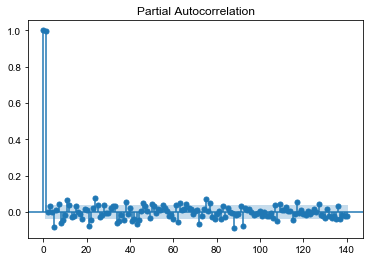

In [79]:
fig, ax = plt.subplots()
tsaplots.plot_pacf(df["开盘"], lags=140, ax=ax)
stattools.pacf(df["开盘"], nlags=140)

噪点比较明显

# 统计间隔变长

In [86]:
import re

pattern = re.compile(r'^(\w+)年(\w+)月(\w+)日$')
res = pattern.match("2021年7月2日")
res.group(1)

'2021'

In [96]:
def to_datetime(s):
    """
    改成时间格式
    """
    print(s)
    res = pattern.match(s)
    print(res)
    return pd.to_datetime(res.group(1), res.group(2), res.group(3))
origin = pd.read_csv('share.csv')
origin = origin[0:-2]
origin = origin.iloc[::-1]
# week = pd.DataFrame({'date': origin['日期'].apply(to_datetime), 'value': origin['开盘'].replace(',','', regex=True).astype('float') })
# combination = pd.Grouper(key='date', freq='1W') # 混合器，按照date列的1小时合并
# count = week.groupby(combination).agg({'value': 'count'}) # 合并之后记录count(总量)
# count
origin['日期'][2:].apply(to_datetime)

2011年6月15日
<re.Match object; span=(0, 10), match='2011年6月15日'>


AssertionError: 